Census Income
Project Description
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import sklearn

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This Dataset contains 32560 rows and 15 columns.out of which 1 is target variable and remaining 14 are independent variables.

EDA(Exploratory Data Analysis)

In [4]:
df.shape

(32560, 15)

In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [7]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

check the null values

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

As we can see there are no null values present in this datase

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype

<Axes: >

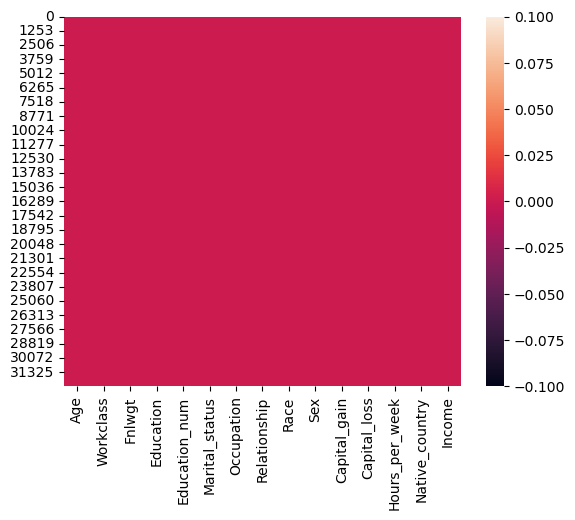

In [11]:
sns.heatmap(df.isnull())

Encoding Technique.

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))
        df

In [13]:
df


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,12.0,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,12,2.0,13.0,5.0,4.0,0.0,0,0,38,39.0,0.0
32556,40,4.0,154374,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0,1.0
32557,58,4.0,151910,11.0,9,6.0,1.0,4.0,4.0,0.0,0,0,40,39.0,0.0
32558,22,4.0,201490,11.0,9,4.0,1.0,3.0,4.0,1.0,0,0,20,39.0,0.0


In [14]:
df.nunique().to_frame('number of unique values')

,number of unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Education_num,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2


Description of dataset(it gives the statistical summary of numerical columns)

In [15]:
df.describe()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
count,32560.000000,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,3.868796,1.897818e+05,10.298249,10.080590,2.611794,6.572912,1.446376,3.665848,0.669195,1077.615172,87.306511,40.437469,36.718796,0.240817
std,13.640642,1.455879,1.055498e+05,3.870317,2.572709,1.506225,4.228809,1.606794,0.848817,0.470510,7385.402999,402.966116,12.347618,7.823892,0.427586
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178315e+05,9.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783630e+05,11.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370545e+05,12.000000,12.000000,4.000000,10.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,6.000000,14.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


This is the Staststical information of the numerical columns.This summary of the dataset looks perfect.since there is no negative /invalid values present. here mean value is greater than Median so there is right skewness present in the dataset. and 75% and Max values are huge difference  hence outliers are  present in the dataset.

Checking the counts of Targets

In [16]:
df['Income'].value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

Data Visualization

0.0    24719
1.0     7841
Name: Income, dtype: int64


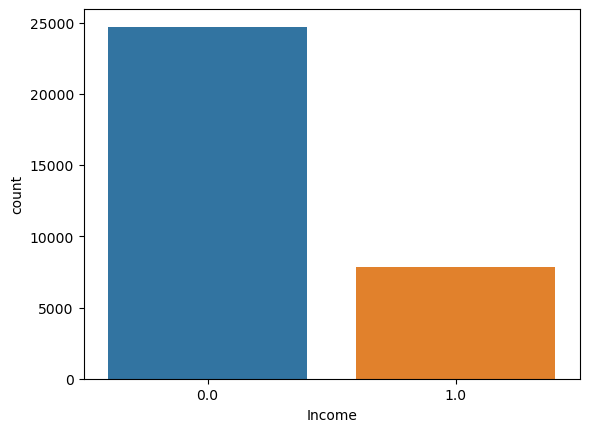

In [17]:
ux=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())
plt.show()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64


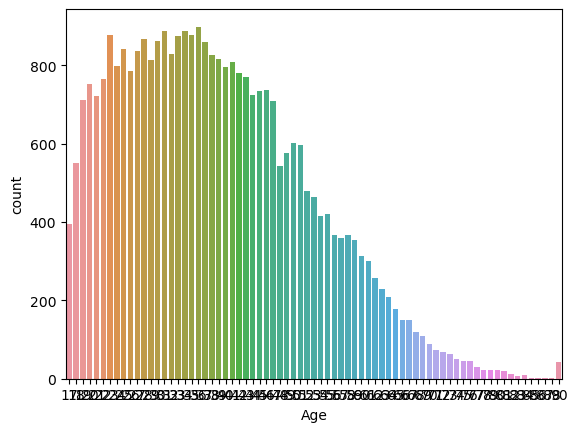

In [18]:
ux=sns.countplot(x='Age',data=df)
print(df['Age'].value_counts())
plt.show()

4.0    22696
6.0     2541
2.0     2093
0.0     1836
7.0     1297
5.0     1116
1.0      960
8.0       14
3.0        7
Name: Workclass, dtype: int64


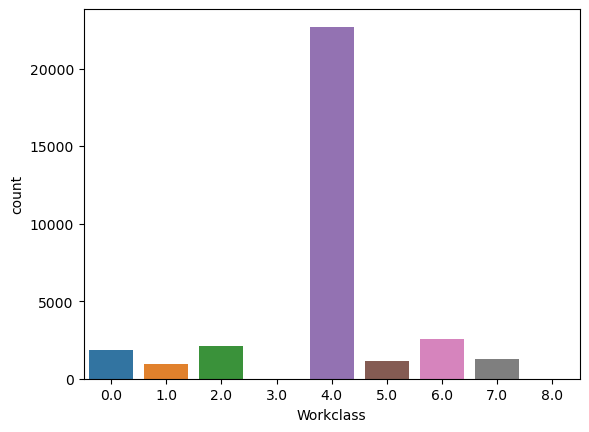

In [19]:
ux=sns.countplot(x='Workclass',data=df)
print(df['Workclass'].value_counts())
plt.show()

164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64


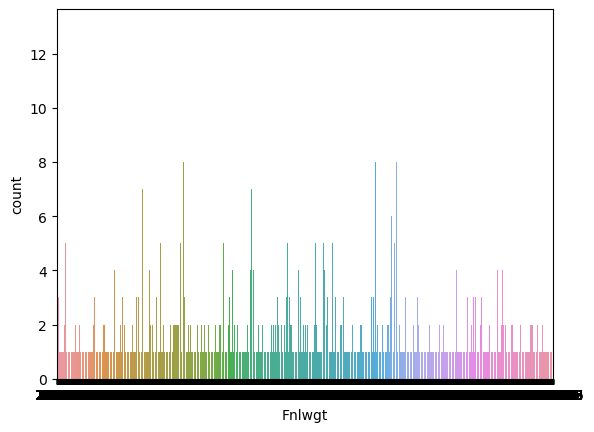

In [20]:
ux=sns.countplot(x='Fnlwgt',data=df)
print(df['Fnlwgt'].value_counts())
plt.show()

11.0    10501
15.0     7291
9.0      5354
12.0     1723
8.0      1382
1.0      1175
7.0      1067
0.0       933
5.0       646
14.0      576
6.0       514
2.0       433
10.0      413
4.0       333
3.0       168
13.0       51
Name: Education, dtype: int64


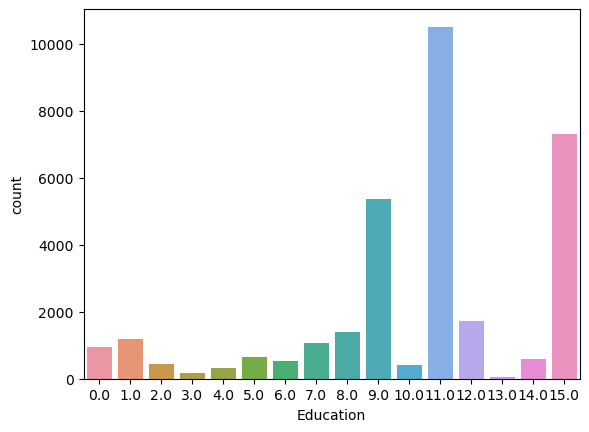

In [21]:
ux=sns.countplot(x='Education',data=df)
print(df['Education'].value_counts())
plt.show()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64


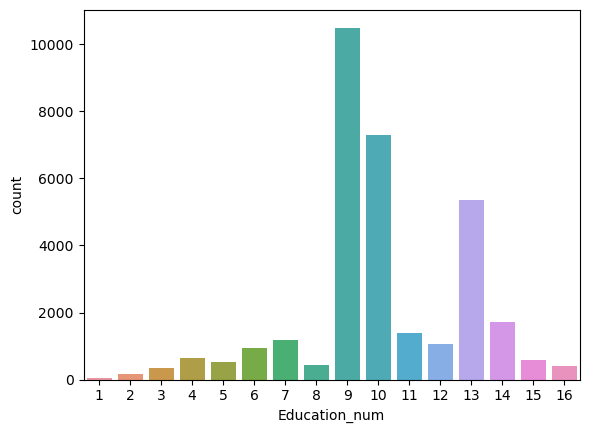

In [22]:
ux=sns.countplot(x='Education_num',data=df)
print(df['Education_num'].value_counts())
plt.show()

2.0    14976
4.0    10682
0.0     4443
5.0     1025
6.0      993
3.0      418
1.0       23
Name: Marital_status, dtype: int64


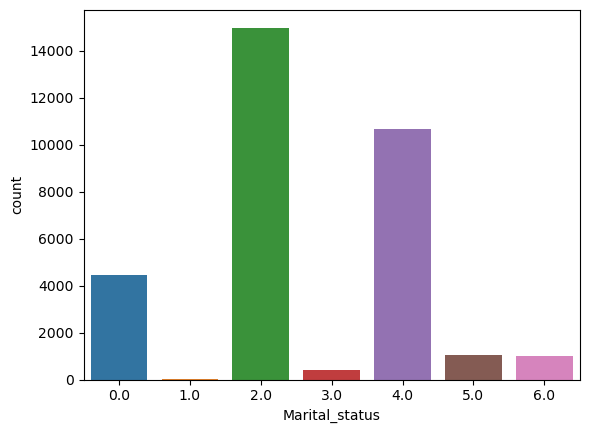

In [23]:
ux=sns.countplot(x='Marital_status',data=df)
print(df['Marital_status'].value_counts())
plt.show()

10.0    4140
3.0     4099
4.0     4066
1.0     3769
12.0    3650
8.0     3295
7.0     2002
0.0     1843
14.0    1597
6.0     1370
5.0      994
13.0     928
11.0     649
9.0      149
2.0        9
Name: Occupation, dtype: int64


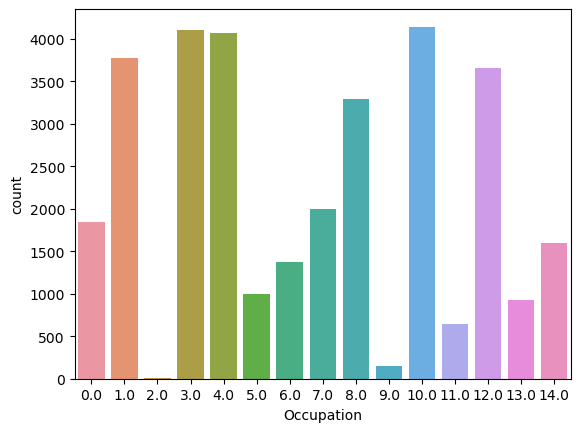

In [24]:
ux=sns.countplot(x='Occupation',data=df)
print(df['Occupation'].value_counts())
plt.show()

10.0    4140
3.0     4099
4.0     4066
1.0     3769
12.0    3650
8.0     3295
7.0     2002
0.0     1843
14.0    1597
6.0     1370
5.0      994
13.0     928
11.0     649
9.0      149
2.0        9
Name: Occupation, dtype: int64


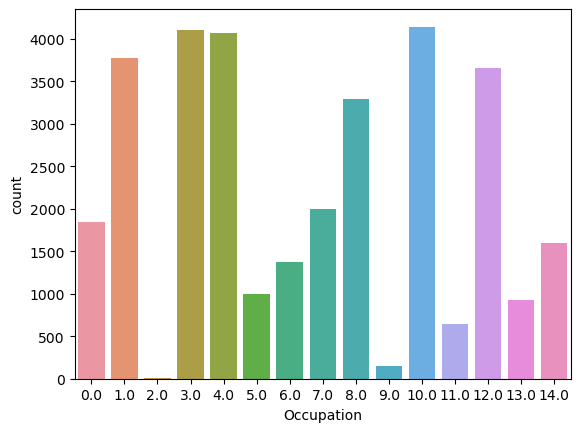

In [25]:
ux=sns.countplot(x='Occupation',data=df)
print(df['Occupation'].value_counts())
plt.show()

0.0    13193
1.0     8304
3.0     5068
4.0     3446
5.0     1568
2.0      981
Name: Relationship, dtype: int64


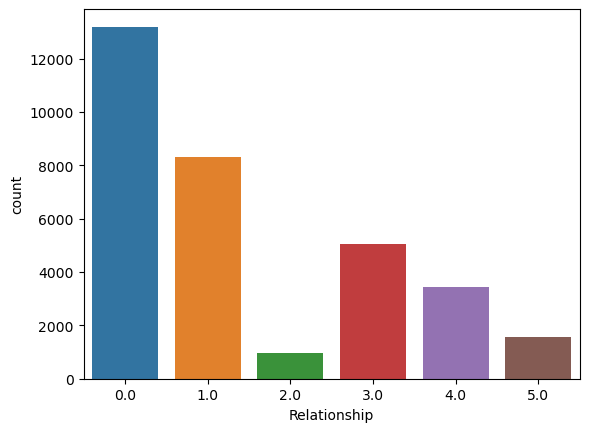

In [26]:
ux=sns.countplot(x='Relationship',data=df)
print(df['Relationship'].value_counts())
plt.show()

4.0    27815
2.0     3124
1.0     1039
0.0      311
3.0      271
Name: Race, dtype: int64


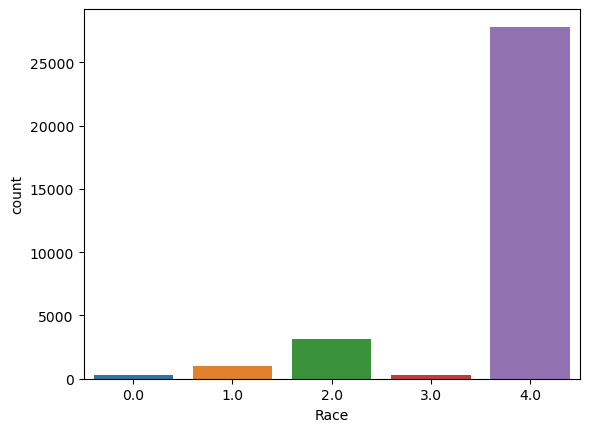

In [27]:
ux=sns.countplot(x='Race',data=df)
print(df['Race'].value_counts())
plt.show()

1.0    21789
0.0    10771
Name: Sex, dtype: int64


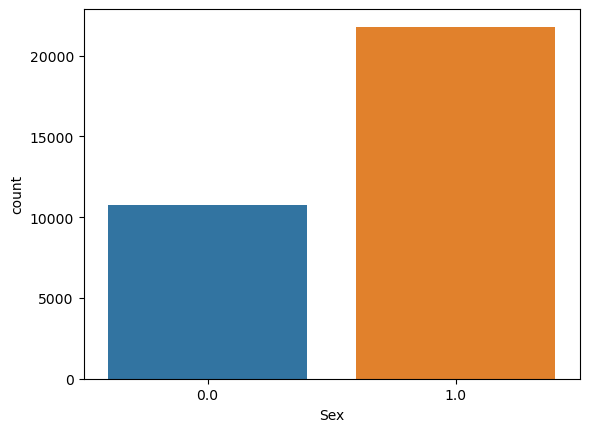

In [28]:
ux=sns.countplot(x='Sex',data=df)
print(df['Sex'].value_counts())
plt.show()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: Capital_gain, Length: 119, dtype: int64


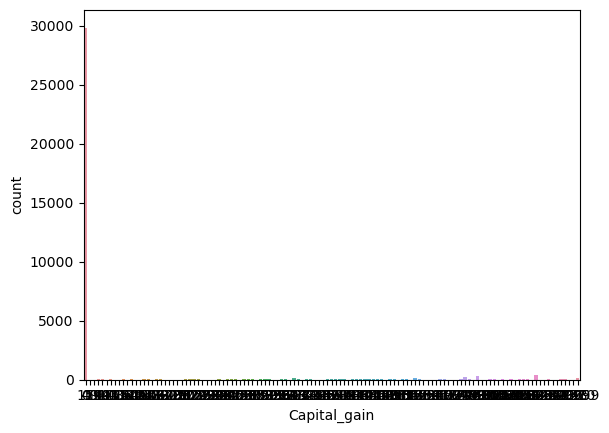

In [29]:
ux=sns.countplot(x='Capital_gain',data=df)
print(df['Capital_gain'].value_counts())
plt.show()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: Capital_loss, Length: 92, dtype: int64


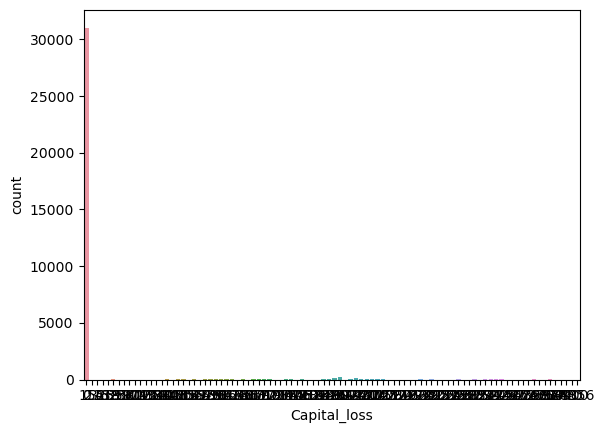

In [30]:
ux=sns.countplot(x='Capital_loss',data=df)
print(df['Capital_loss'].value_counts())
plt.show()

40    15216
50     2819
45     1824
60     1475
35     1297
      ...  
82        1
94        1
92        1
74        1
87        1
Name: Hours_per_week, Length: 94, dtype: int64


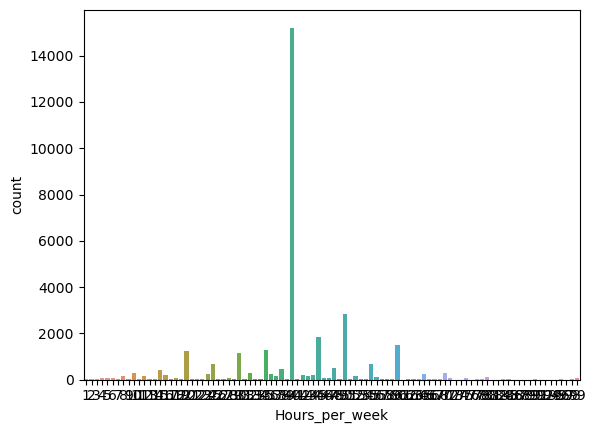

In [31]:
ux=sns.countplot(x='Hours_per_week',data=df)
print(df['Hours_per_week'].value_counts())
plt.show()

39.0    29169
26.0      643
0.0       583
30.0      198
11.0      137
2.0       121
33.0      114
8.0       106
19.0      100
5.0        95
9.0        90
23.0       81
35.0       80
3.0        75
22.0       73
6.0        70
40.0       67
13.0       64
24.0       62
31.0       60
4.0        59
36.0       51
14.0       44
20.0       43
32.0       37
27.0       34
29.0       31
10.0       29
12.0       29
7.0        28
21.0       24
17.0       20
1.0        19
38.0       19
25.0       18
37.0       18
41.0       16
28.0       14
16.0       13
18.0       13
34.0       12
15.0        1
Name: Native_country, dtype: int64


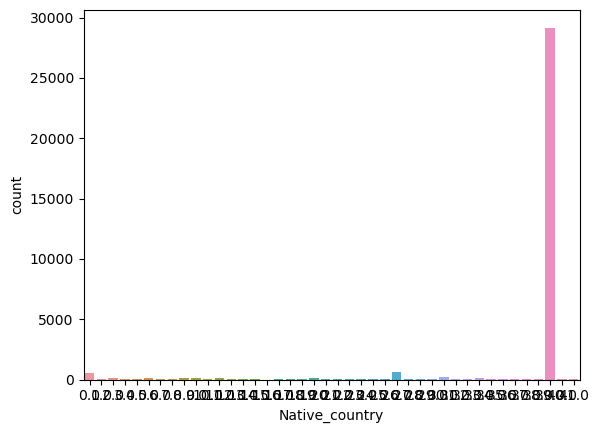

In [32]:
ux=sns.countplot(x='Native_country',data=df)
print(df['Native_country'].value_counts())
plt.show()

Here we are checking outliers in the data.

Age                  Axes(0.125,0.653529;0.133621x0.226471)
Workclass         Axes(0.285345,0.653529;0.133621x0.226471)
Fnlwgt             Axes(0.44569,0.653529;0.133621x0.226471)
Education         Axes(0.606034,0.653529;0.133621x0.226471)
Education_num     Axes(0.766379,0.653529;0.133621x0.226471)
Marital_status       Axes(0.125,0.381765;0.133621x0.226471)
Occupation        Axes(0.285345,0.381765;0.133621x0.226471)
Relationship       Axes(0.44569,0.381765;0.133621x0.226471)
Race              Axes(0.606034,0.381765;0.133621x0.226471)
Sex               Axes(0.766379,0.381765;0.133621x0.226471)
Capital_gain             Axes(0.125,0.11;0.133621x0.226471)
Capital_loss          Axes(0.285345,0.11;0.133621x0.226471)
Hours_per_week         Axes(0.44569,0.11;0.133621x0.226471)
Native_country        Axes(0.606034,0.11;0.133621x0.226471)
Income                Axes(0.766379,0.11;0.133621x0.226471)
dtype: object

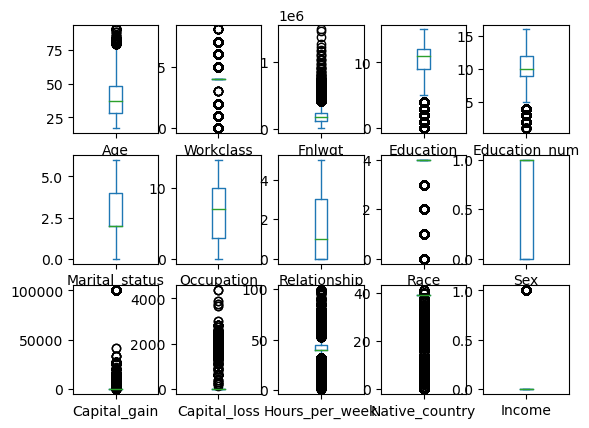

In [33]:
df.plot(kind='box',subplots=True,layout=(3,5))

As you can see outliers are present in this dataset to remove the outliers we use Zscore method to remove the outlier

In [35]:
from scipy.stats import zscore
out_features=df[['Age','Workclass','Education','Fnlwgt','Education_num','Race','Capital_gain','Capital_loss','Hours_per_week','Native_country']]
z=np.abs(zscore(out_features))
z

,Age,Workclass,Education,Fnlwgt,Education_num,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,1.463883,0.335443,1.008742,1.134779,0.393675,0.145914,0.216663,2.222120,0.291573
1,0.042640,0.090121,0.181319,0.245046,0.420027,0.393675,0.145914,0.216663,0.035430,0.291573
2,1.057031,0.090121,2.402489,0.425770,1.197429,1.962583,0.145914,0.216663,0.035430,0.291573
3,0.775755,0.090121,0.335443,1.408146,1.134779,1.962583,0.145914,0.216663,0.035430,4.054157
4,0.115952,0.090121,0.439700,0.898170,1.523480,0.393675,0.145914,0.216663,0.035430,0.291573
...,...,...,...,...,...,...,...,...,...,...
32555,0.849066,0.090121,0.852204,0.639710,0.746077,0.393675,0.145914,0.216663,0.197407,0.291573
32556,0.103982,0.090121,0.181319,0.335466,0.420027,0.393675,0.145914,0.216663,0.035430,0.291573
32557,1.423589,0.090121,0.181319,0.358811,0.420027,0.393675,0.145914,0.216663,0.035430,0.291573
32558,1.215624,0.090121,0.181319,0.110927,0.420027,0.393675,0.145914,0.216663,1.655200,0.291573


In [36]:
threshold=3
np.where(z>3)

(array([    3,     9,    10, ..., 32532, 32550, 32552], dtype=int64),
 array([9, 8, 5, ..., 5, 5, 5], dtype=int64))

In [37]:
df1=df[(z<3).all(axis=1)]

In [38]:
df1.shape

(27417, 15)

In [39]:
print('old dataframe:',df.shape[0])
print('new dataframe:',df1.shape[0])

old dataframe: 32560
new dataframe: 27417


In [40]:
print('datalosspercentage:',((df.shape[0]-df1.shape[0])/df.shape[0])*100)

datalosspercentage: 15.795454545454547


As we can see there is less than 15% of data loss after removing the outliers so it is not considerable.

Checking Skewness

In [41]:
df.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
Income             1.212383
dtype: float64

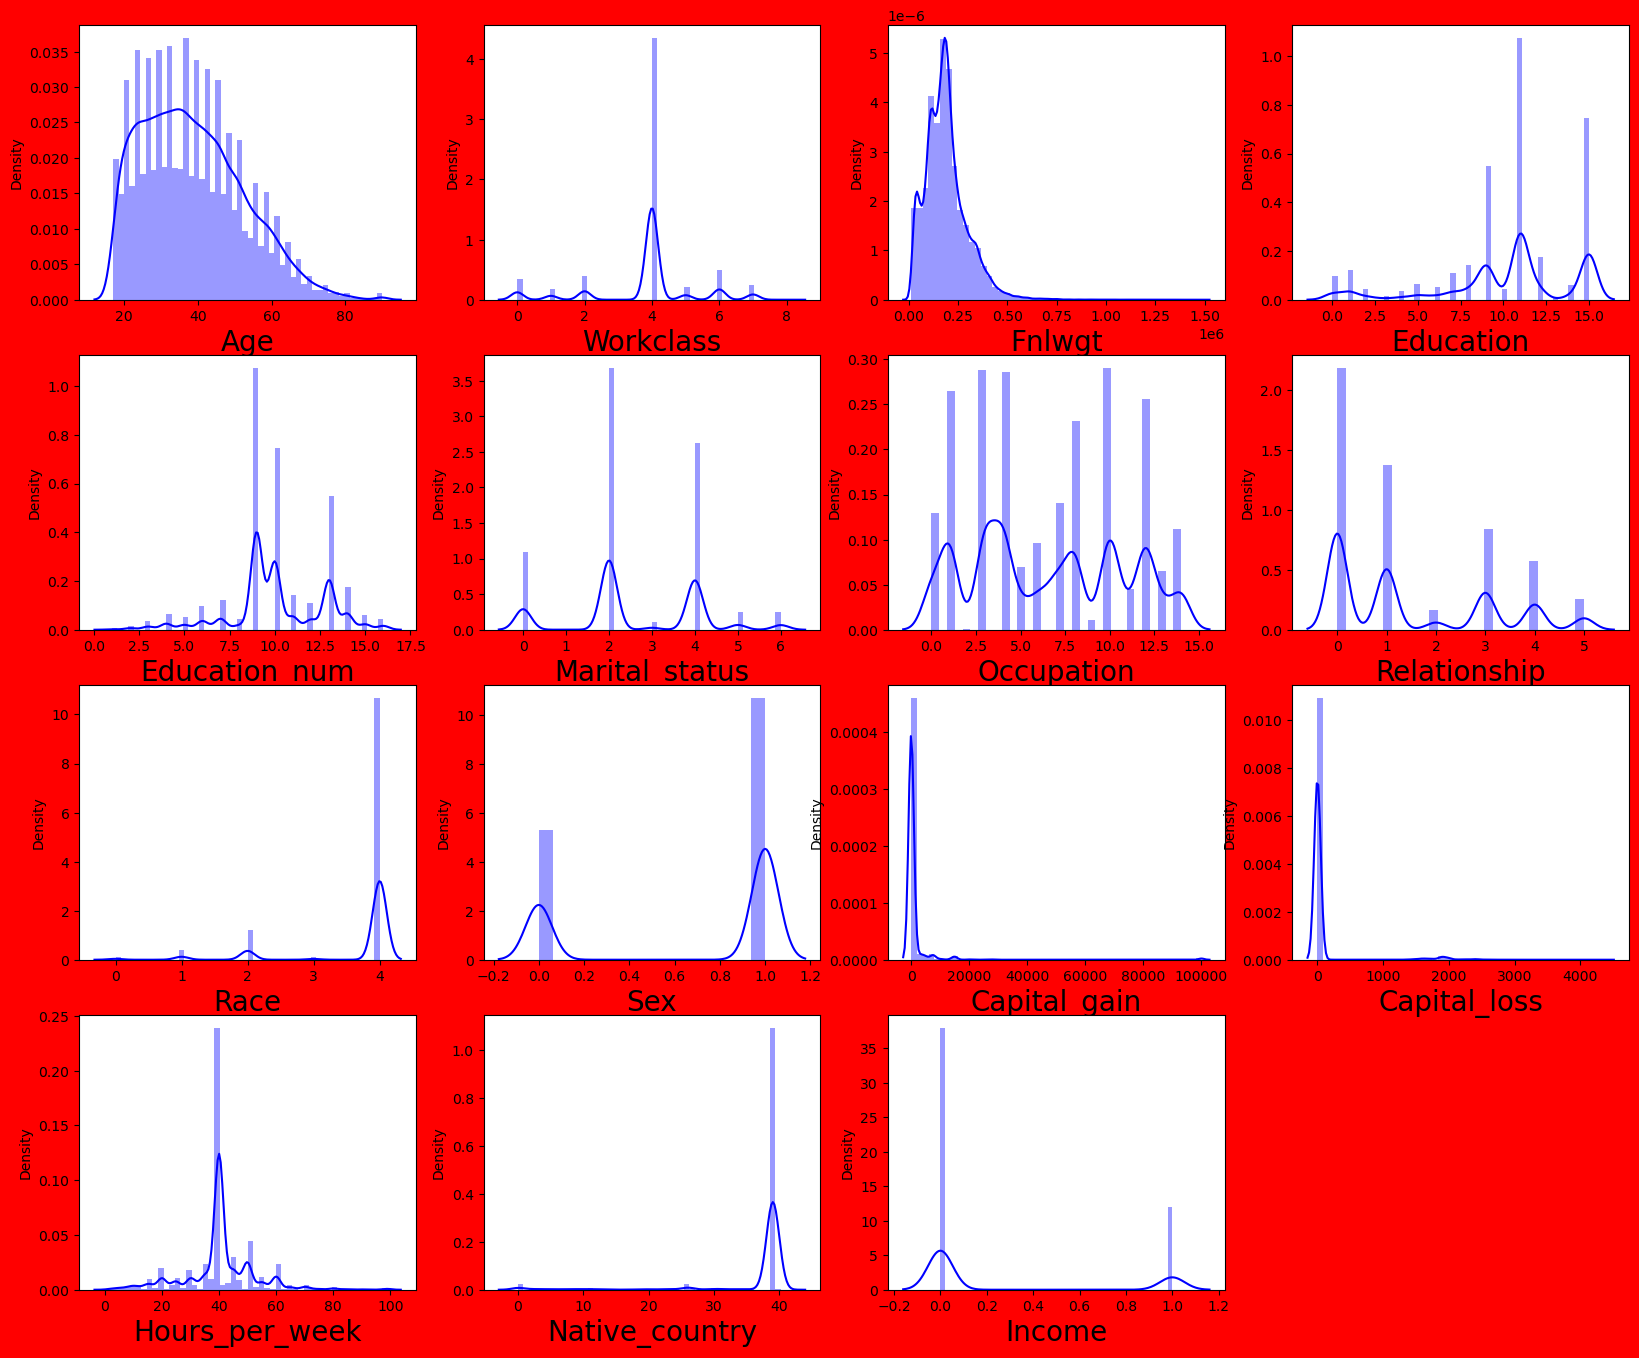

In [42]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

In [43]:
df['Workclass']=np.cbrt(df['Workclass'])

In [44]:
df['Fnlwgt']=np.cbrt(df['Fnlwgt'])

In [45]:
df['Capital_gain']=np.cbrt(df['Capital_gain'])

In [46]:
df['Capital_loss']=np.cbrt(df['Capital_loss'])

In [47]:
df.skew()

Age               0.558738
Workclass        -2.923788
Fnlwgt           -0.164177
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      4.100150
Capital_loss      4.336999
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

In [48]:
df['Capital_gain']=np.sqrt(df['Capital_gain'])

In [49]:
df['Capital_loss']=np.sqrt(df['Capital_loss'])

In [50]:
df.skew()

Age               0.558738
Workclass        -2.923788
Fnlwgt           -0.164177
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.114540
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.227650
Capital_loss      4.310426
Hours_per_week    0.227636
Native_country   -3.658235
Income            1.212383
dtype: float64

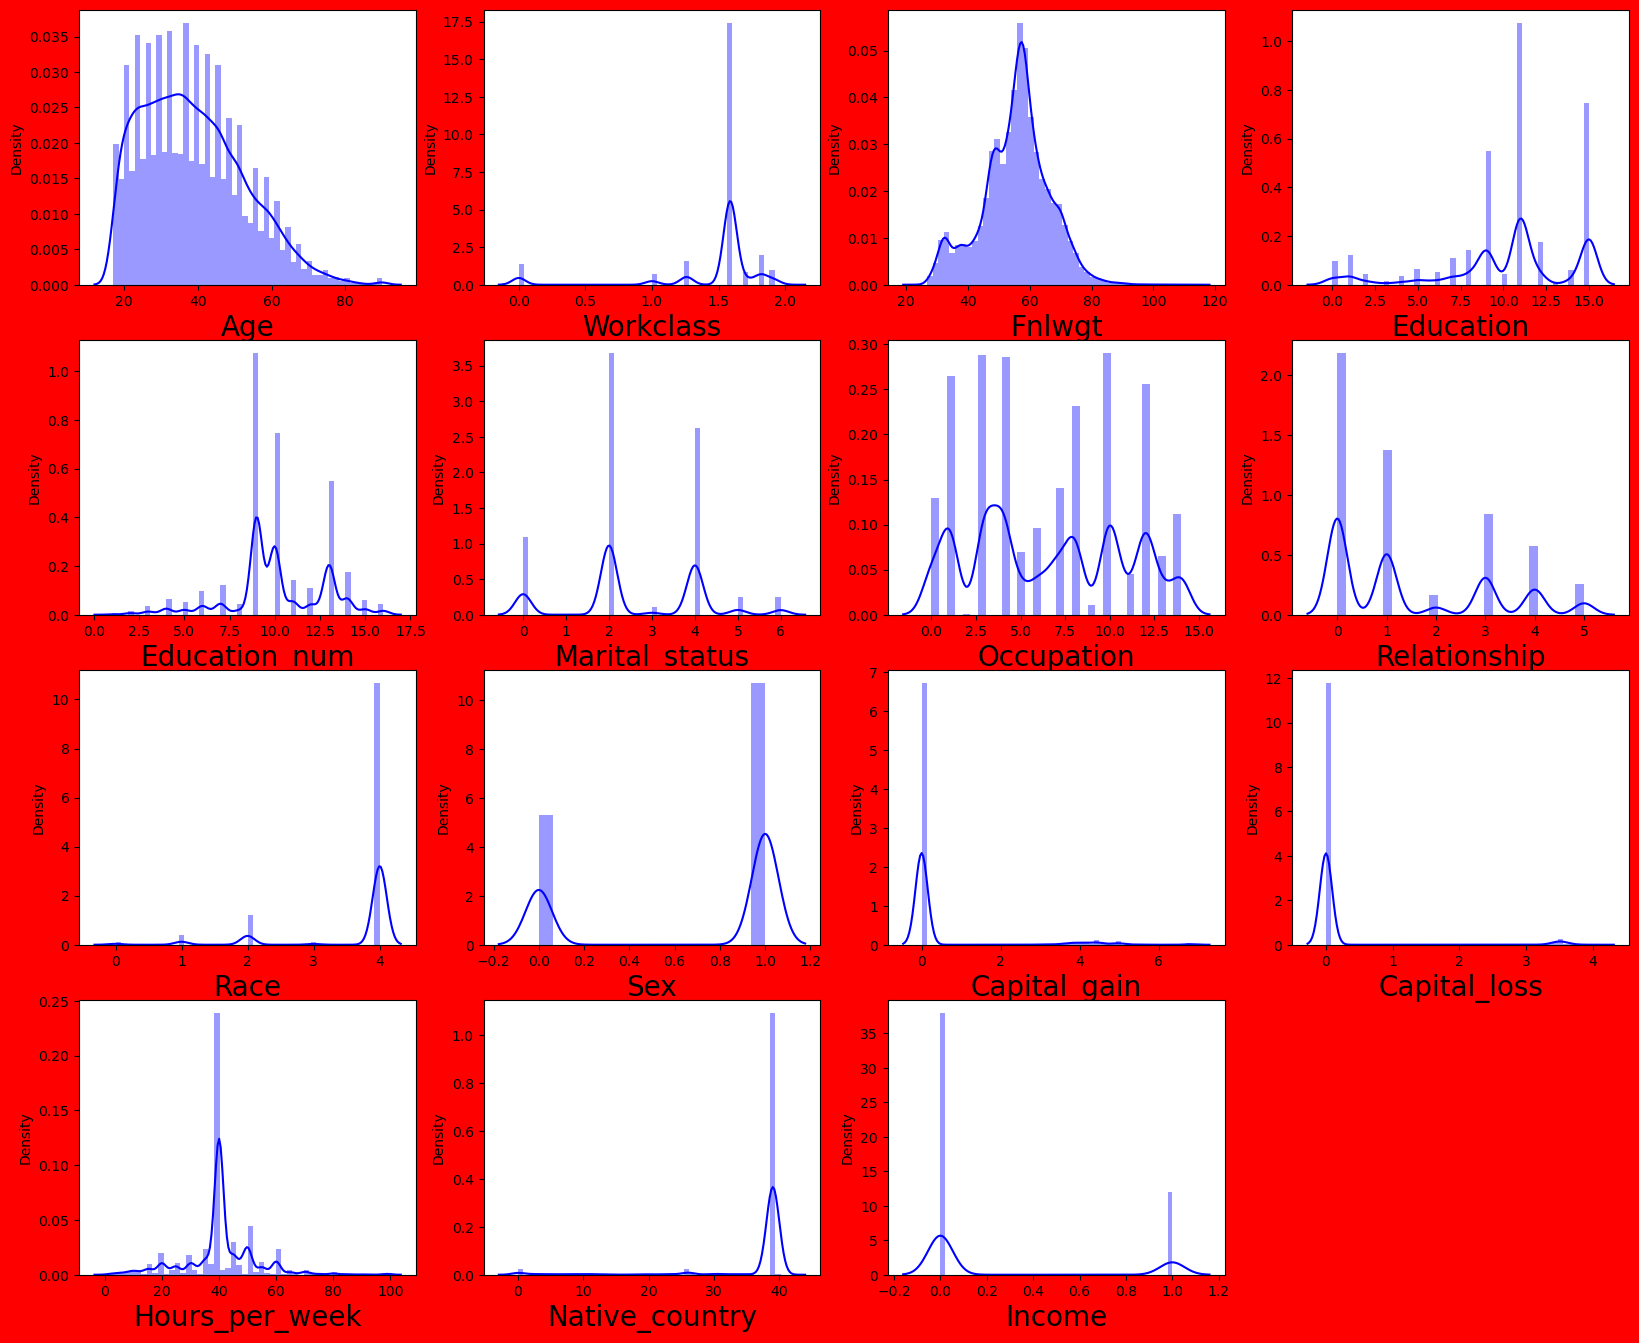

In [51]:
plt.figure(figsize=(20,25),facecolor='red')
num=1
for column in df:
    if num<=18:
        ax=plt.subplot(6,4,num)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
        
    num+=1
plt.show()

skewness more than+/- 0.5 will we treated

object columns will no be treated

Checking the Correlation b/w Target variable and Independent variable.

In [52]:
df.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,-0.034881,-0.068166,-0.010508,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.125210,0.051711,0.068756,-0.001151,0.234039
Workclass,-0.034881,1.000000,-0.000825,0.024698,0.059801,-0.073202,0.354458,-0.084909,0.040909,0.085535,0.021310,0.013766,0.166704,-0.010463,0.064867
Fnlwgt,-0.068166,-0.000825,1.000000,-0.029089,-0.040712,0.027510,0.002661,0.010216,-0.013139,0.022738,-0.001735,-0.005979,-0.022684,-0.058644,-0.004462
Education,-0.010508,0.024698,-0.029089,1.000000,0.359172,-0.038398,-0.021274,-0.010879,0.014135,-0.027349,0.026646,0.016668,0.055510,0.064291,0.079311
Education_num,0.036527,0.059801,-0.040712,0.359172,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.134979,0.077315,0.148127,0.050831,0.335182
Marital_status,-0.266292,-0.073202,0.027510,-0.038398,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.067556,-0.035913,-0.190521,-0.023827,-0.199295
Occupation,-0.020946,0.354458,0.002661,-0.021274,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.021455,0.018799,0.080384,-0.012532,0.075448
Relationship,-0.263698,-0.084909,0.010216,-0.010879,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.084681,-0.057643,-0.248975,-0.005504,-0.250924
Race,0.028718,0.040909,-0.013139,0.014135,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.023926,0.018387,0.041910,0.137849,0.071853
Sex,0.088832,0.085535,0.022738,-0.027349,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.070170,0.042744,0.229312,-0.008125,0.215995


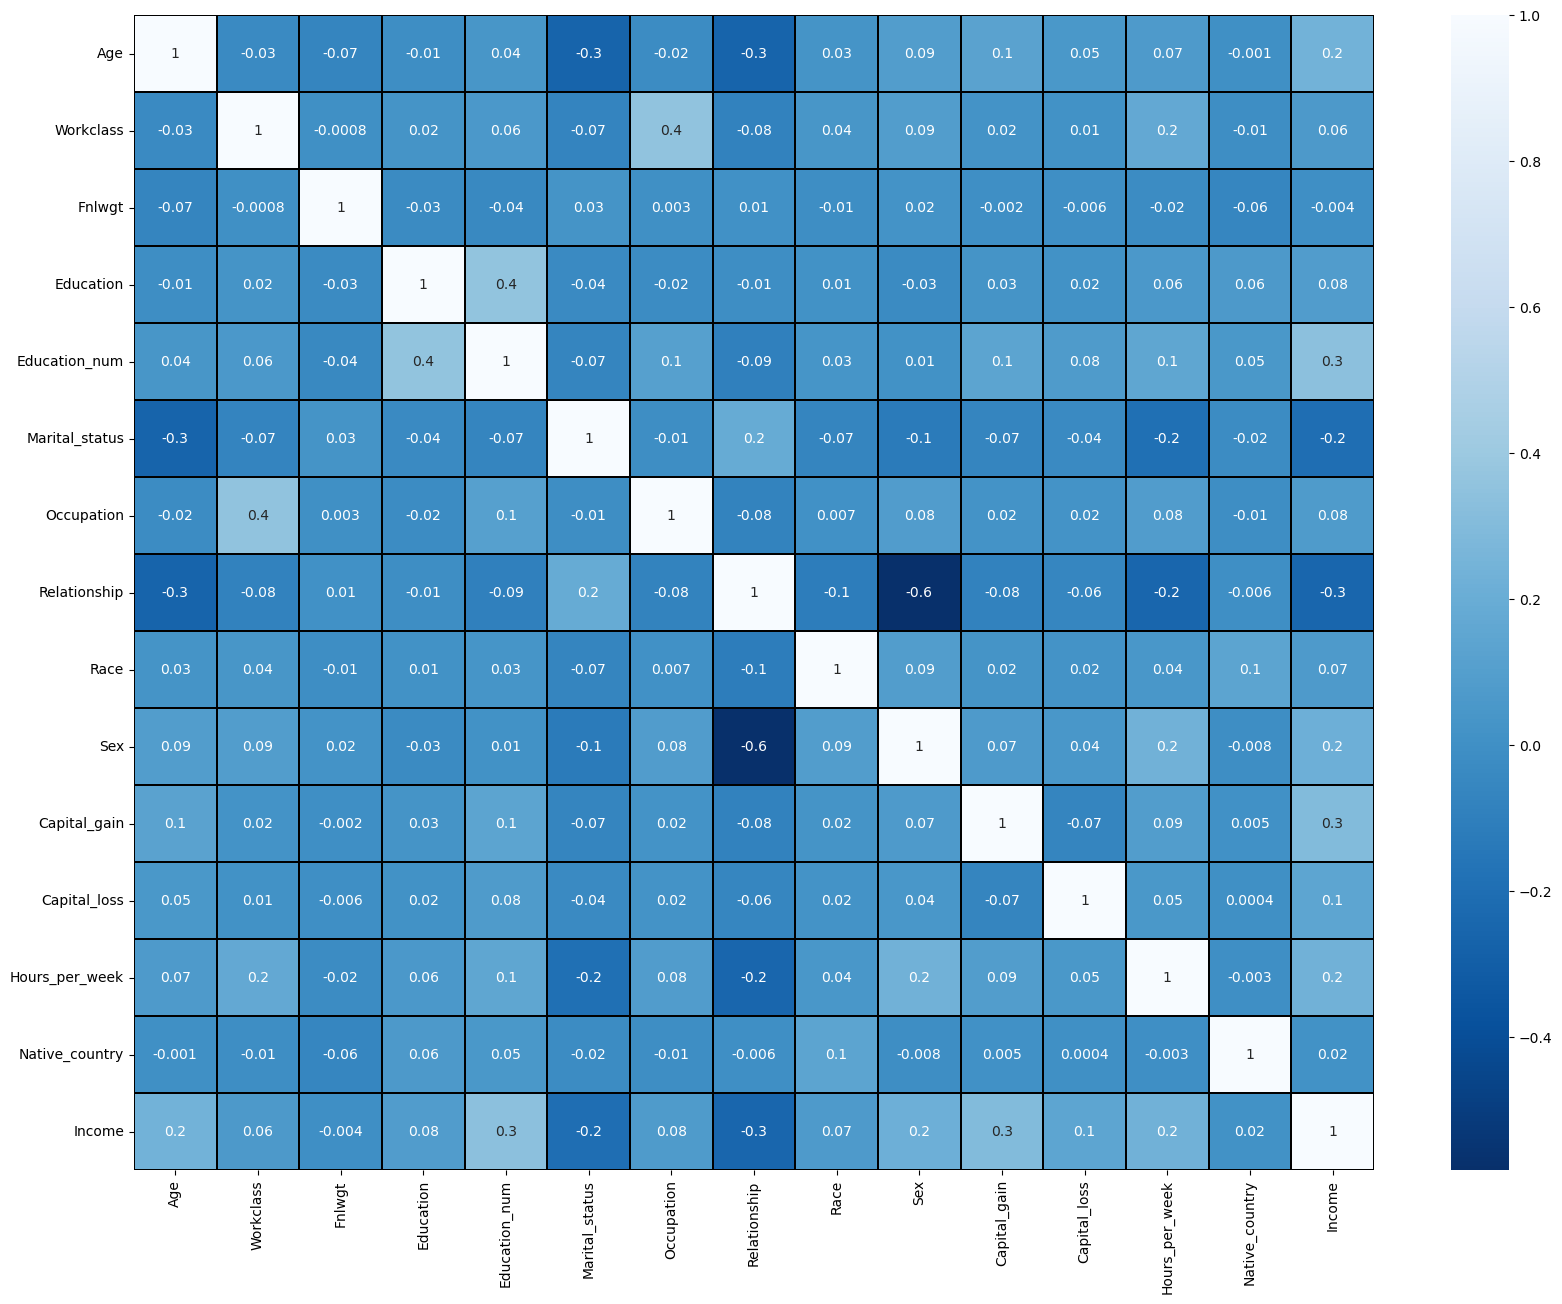

In [53]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt='.1g',linecolor='black',annot=True,cmap='Blues_r')
plt.yticks(rotation=0)
plt.show()
                    

In [54]:
x=df.drop(['Income'],axis=1)
y=df['Income']

In [55]:
x.shape

(32560, 14)

In [56]:
y.shape

(32560,)

Feature scaling using StandardScaler method.

In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [58]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,0.837097,0.807140,-1.087299,-0.335443,1.134779,-0.406183,-0.608434,-0.900177,0.393675,0.703087,-0.296159,-0.221029,-2.222120,0.291573
1,-0.042640,0.231954,0.417231,0.181319,-0.420027,-1.734026,-0.135480,-0.277810,0.393675,0.703087,-0.296159,-0.221029,-0.035430,0.291573
2,1.057031,0.231954,0.575923,-2.402489,-1.197429,-0.406183,-0.135480,-0.900177,-1.962583,0.703087,-0.296159,-0.221029,-0.035430,0.291573
3,-0.775755,0.231954,1.314762,-0.335443,1.134779,-0.406183,0.810427,2.211658,-1.962583,-1.422298,-0.296159,-0.221029,-0.035430,-4.054157
4,-0.115952,0.231954,0.953682,0.439700,1.523480,-0.406183,-0.608434,2.211658,0.393675,-1.422298,-0.296159,-0.221029,-0.035430,0.291573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-0.849066,0.231954,0.753034,-0.852204,0.746077,-0.406183,1.519858,2.211658,0.393675,-1.422298,-0.296159,-0.221029,-0.197407,0.291573
32556,0.103982,0.231954,-0.166659,0.181319,-0.420027,-0.406183,0.100997,-0.900177,0.393675,0.703087,-0.296159,-0.221029,-0.035430,0.291573
32557,1.423589,0.231954,-0.193158,0.181319,-0.420027,2.249503,-1.317864,1.589291,0.393675,-1.422298,-0.296159,-0.221029,-0.035430,0.291573
32558,-1.215624,0.231954,0.293303,0.181319,-0.420027,0.921660,-1.317864,0.966924,0.393675,0.703087,-0.296159,-0.221029,-1.655200,0.291573


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

,vif values,features
0,1.170429,Age
1,1.179181,Workclass
2,1.011071,Fnlwgt
3,1.159860,Education
4,1.222350,Education_num
5,1.129696,Marital_status
6,1.164975,Occupation
7,1.682930,Relationship
8,1.037677,Race
9,1.558862,Sex


As we can seee there is no multicorrelation present in the dataset so we can now ahead of model building

In [60]:
y.value_counts()

0.0    24719
1.0     7841
Name: Income, dtype: int64

Here we can see that data is not balanced since it is a classification problem we will balance the data using Oversampling method.

OverSampling here we use SMOTE method.

In [61]:
import sklearn
!pip install imbalanced_learn
from imblearn.over_sampling import SMOTE
smt=SMOTE()


In [62]:
trainx,trainy=smt.fit_resample(x,y)

In [63]:
trainx.value_counts()

Age        Workclass  Fnlwgt     Education  Education_num  Marital_status  Occupation  Relationship  Race       Sex        Capital_gain  Capital_loss  Hours_per_week  Native_country
-0.042640  0.231954    0.343986   0.181319  -0.420027      -0.406183        0.100997   -0.900177      0.393675   0.703087  -0.296159     -0.221029      0.612478        0.291573         3
 0.250605  0.231954    0.317777   1.214842  -0.031325      -0.406183        0.810427   -0.900177      0.393675   0.703087  -0.296159     -0.221029     -0.035430        0.291573         3
-0.995689  0.231954    0.243624  -1.885727  -3.140936       0.921660        0.573950   -0.277810      0.393675  -1.422298  -0.296159     -0.221029     -0.035430       -3.031632         3
                       1.116897  -0.335443   1.134779       0.921660       -0.844911   -0.277810      0.393675   0.703087  -0.296159     -0.221029     -0.035430       -1.370029         2
-0.629132  0.231954   -0.273575   0.181319  -0.420027       0.921660  

In [64]:
trainy.value_counts()

0.0    24719
1.0    24719
Name: Income, dtype: int64

In [65]:
trainy

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
49433    1.0
49434    1.0
49435    1.0
49436    1.0
49437    1.0
Name: Income, Length: 49438, dtype: float64

<Axes: ylabel='count'>

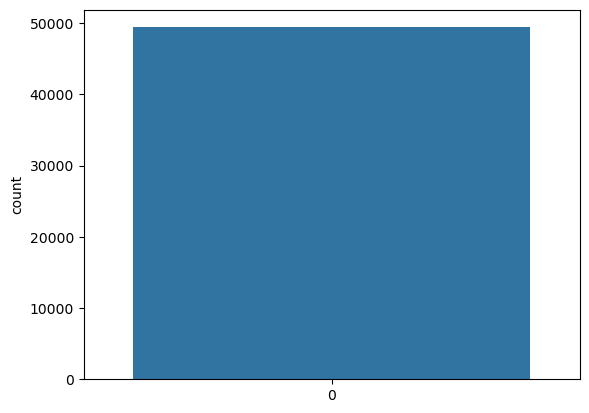

In [66]:
sns.countplot(trainy)

Model Bulding

As you can see this is Classification problem in this we have catgerocial data present so we use Classification model here

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=0)

In [69]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
acc=accuracy_score(y_test,pred)
print(accuracy_score(y_test,pred))

0.858005733005733


In [70]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))


0.8584152334152334
[[6943  511]
 [ 872 1442]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      7454
         1.0       0.74      0.62      0.68      2314

    accuracy                           0.86      9768
   macro avg       0.81      0.78      0.79      9768
weighted avg       0.85      0.86      0.85      9768



In [71]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.847972972972973
[[7026  428]
 [1057 1257]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      7454
         1.0       0.75      0.54      0.63      2314

    accuracy                           0.85      9768
   macro avg       0.81      0.74      0.77      9768
weighted avg       0.84      0.85      0.84      9768



In [72]:
ac=AdaBoostClassifier()
ac.fit(x_train,y_train)
predac=ac.predict(x_test)
print(accuracy_score(y_test,predac))
print(confusion_matrix(y_test,predac))
print(classification_report(y_test,predac))

0.8592342342342343
[[6983  471]
 [ 904 1410]]
              precision    recall  f1-score   support

         0.0       0.89      0.94      0.91      7454
         1.0       0.75      0.61      0.67      2314

    accuracy                           0.86      9768
   macro avg       0.82      0.77      0.79      9768
weighted avg       0.85      0.86      0.85      9768



In [73]:
bc=BaggingClassifier()
bc.fit(x_train,y_train)
predbc=bc.predict(x_test)
print(accuracy_score(y_test,predbc))
print(confusion_matrix(y_test,predbc))
print(classification_report(y_test,predbc))


0.8457207207207207
[[6923  531]
 [ 976 1338]]
              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90      7454
         1.0       0.72      0.58      0.64      2314

    accuracy                           0.85      9768
   macro avg       0.80      0.75      0.77      9768
weighted avg       0.84      0.85      0.84      9768



In [74]:
et=ExtraTreesClassifier()
et.fit(x_train,y_train)
predet=et.predict(x_test)
print(accuracy_score(y_test,predet))
print(confusion_matrix(y_test,predet))
print(classification_report(y_test,predet))


0.8459254709254709
[[6833  621]
 [ 884 1430]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90      7454
         1.0       0.70      0.62      0.66      2314

    accuracy                           0.85      9768
   macro avg       0.79      0.77      0.78      9768
weighted avg       0.84      0.85      0.84      9768



In [75]:
from sklearn.tree import DecisionTreeClassifier
dc= DecisionTreeClassifier()
dc.fit(x_train,y_train)
preddc=dc.predict(x_test)
print(accuracy_score(y_test,preddc))
print(confusion_matrix(y_test,preddc))
print(classification_report(y_test,preddc))


0.8105036855036855
[[6500  954]
 [ 897 1417]]
              precision    recall  f1-score   support

         0.0       0.88      0.87      0.88      7454
         1.0       0.60      0.61      0.60      2314

    accuracy                           0.81      9768
   macro avg       0.74      0.74      0.74      9768
weighted avg       0.81      0.81      0.81      9768



Now we can check cross valdiation of all the model

In [76]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predRFC)-score.mean())

[0.85488329 0.85257985 0.85641892 0.8610258  0.85534398]
0.8560503685503686
difference b/w Accuracy_score and cross_val_score is: 0.0023648648648647574


In [85]:
score=cross_val_score(ac,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predac)-score.mean())

[0.8544226  0.85227273 0.85933661 0.86640049 0.86164005]
0.8588144963144962
difference b/w Accuracy_score and cross_val_score is: 0.0004197379197380391


In [87]:
score=cross_val_score(bc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predbc)-score.mean())



[0.84198403 0.83968059 0.84490172 0.8519656  0.8458231 ]
0.8448710073710075
difference b/w Accuracy_score and cross_val_score is: 0.000849713349713177


In [90]:
score=cross_val_score(svc,x,y)
print(score)
print(score.mean())
print('difference b/w Accuracy_score and cross_val_score is:',accuracy_score(y_test,predsvc)-score.mean())

[0.84367322 0.8416769  0.84428747 0.84966216 0.8482801 ]
0.8455159705159707
difference b/w Accuracy_score and cross_val_score is: 0.0004095004095001631


As we can see above all model Accuracy_score and crossval_score is less and score mean is 85% in AdaBoostClassifier() model so this is the best model.

Hyper parameter tunning

In [94]:
from sklearn.model_selection import  RandomizedSearchCV
param={'algorithm':['SAMME', 'SAMME.R']}
rscv= RandomizedSearchCV(AdaBoostClassifier(),param,cv=5)
rscv.fit(x_train,y_train)
rscv.best_params_

{'algorithm': 'SAMME.R'}

In [95]:
model=AdaBoostClassifier(algorithm='SAMME.R')
model.fit(x_train,y_train)
pred=model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.92342342342343


Plotting Roc and AUC curve

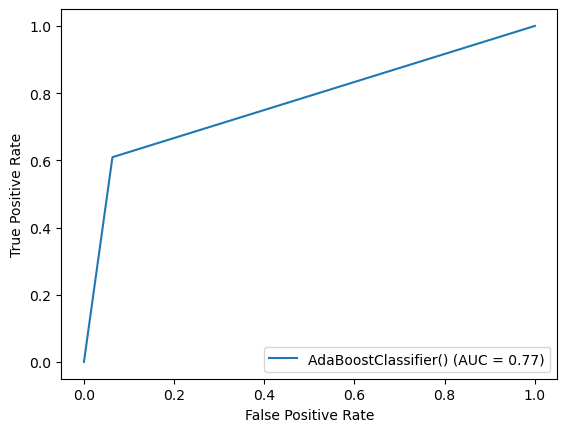

In [100]:
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thresholds =roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=model)
display.plot()

Save the model

In [101]:
import joblib
model=joblib.dump(model,'Census')

In [102]:
import joblib
model=joblib.load('Census')
prediction=model.predict(x_test)
prediction

array([0., 0., 0., ..., 1., 0., 0.])

In [103]:
a=np.array(y_test)
df=pd.DataFrame()
df['prediction']=prediction
df['original']=a
df

,prediction,original
0,0.0,1.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9763,0.0,0.0
9764,1.0,1.0
9765,1.0,1.0
9766,0.0,0.0
